In [1]:
from SimpleCV import Image
import time
img = Image('messi5.jpg')
img.show()
time.sleep(1)

mult = img * 2
mult.show()
time.sleep(1)

div = mult / 2
div.show()

<SimpleCV.Display Object resolution:((800, 600)), Image Resolution: (800, 600) at memory location: (0x7746fc8L)>

### Mean detection

In [ ]:
from SimpleCV import Camera, Display
import time
# if mean color exceeds this amount, do something
threshold = 5.0
cam = Camera()
previous = cam.getImage()
disp = Display(previous.size())
while not disp.isDone():
    # Grab another frame and compare with previous
    current = cam.getImage()
    diff = current - previous
    # Convert to NumPy matrix and compute mean color
    matrix = diff.getNumpy()
    mean = matrix.mean()
    # Show on screen
    diff.save(disp)
    # Check if changed
    if mean >= threshold:
        print "Motion Detected ", "mean = ", mean 
        #wait for a second
        time.sleep(1)
        previous = current

Motion Detected  mean =  9.61972005208
Motion Detected  mean =  50.5305588108
Motion Detected  mean =  27.6548242188
Motion Detected  mean =  7.45601453993
Motion Detected  mean =  7.5854296875
Motion Detected  mean =  7.84367404514
Motion Detected  mean =  5.5338140191


### Histograms

In [1]:
from SimpleCV import Image
img = Image('messigray.png')
# Generate the histogram
histogram = img.histogram()
# Output the raw histogram data (50 bins by default)
print histogram

[1981L, 1344L, 1435L, 1810L, 1135L, 1112L, 936L, 695L, 647L, 1026L, 960L, 1464L, 2809L, 3406L, 3221L, 5261L, 4812L, 6816L, 9812L, 6125L, 9335L, 10985L, 15195L, 14946L, 14511L, 16234L, 13233L, 12694L, 28031L, 18250L, 24412L, 22640L, 22115L, 19482L, 28614L, 18668L, 25124L, 29978L, 37320L, 19361L, 13453L, 2958L, 1978L, 1473L, 1388L, 407L, 280L, 94L, 30L, 4L]


The histogram() function divides the dataset into bins which
combine values from the x-axis of the chart. This has a tendency to smooth out the
chart by grouping levels together. However, the number of bins is customizable.

In [2]:
from SimpleCV import Image
img = Image('messigray.png')
# Generate the histogram with 256 bins, one for each color
histogram = img.histogram(256)
# Show how many elements are in the list
len(histogram)

256

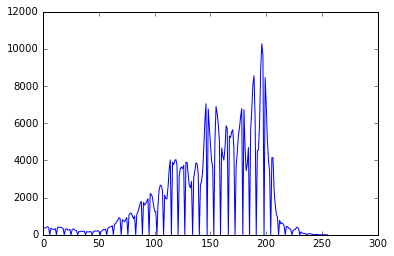

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from SimpleCV import Image
img = Image('messigray.png')
# Generate the histogram with 256 bins, one for each color
histogram = img.histogram(256)
# Graphically display the histogram
plt.plot(histogram)

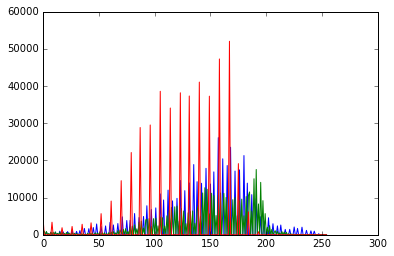

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from SimpleCV import Image
img = Image('messi5.jpg')
# Extract the three color channels
# The splitChannels() function creates three images. The three images contain the
# red components, the green components, and the blue components, respectively. By
# default, this actually creates three grayscale images, showing the intensity of each
# individual color. By passing the parameter False, it keeps the original color, which
# is more intuitively appealing.
(red, green, blue) = img.splitChannels(False)
# The individual histograms
red_histogram = red.histogram(255)
green_histogram = green.histogram(255)
blue_histogram = blue.histogram(255)
# Plot the histograms
plt.plot(red_histogram)
plt.plot(green_histogram)
plt.plot(blue_histogram)


### Dominant color

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

[(13.921787709497206, 0.11952224983058504)]


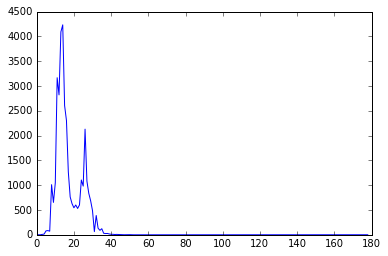

In [5]:
from SimpleCV import Image
img = Image('monalisa.png')
# Get the histogram
histogram = img.hueHistogram()
plt.plot(histogram)
# Get the hue peaks
peaks = img.huePeaks()
# Prints: [(12.927374301675977, 0.11747342828238252)]
print peaks

The output of the huePeaks function is an array of tuples. If there is a single dominant
peak, then there is only one element in the array. The first value of the tuple is the bin
that occurs most frequently. The second value is the percent of pixels that match that
color.   
In example above bin 14 is most common (appears in 12% of time)

In [7]:
from SimpleCV import Image
img = Image('monalisa.png')
# Find the dominant hue
peaks = img.huePeaks()

# The function huePeaks() returns an array of tuples. The first [0] returns the first (and
# only) element of the array. The second [0] returns the first value of the tuple, which
# corresponds to the most frequently occurring hue.
peak_one = peaks[0][0]

# Get the hue distance to create a mask
# The hueDistance() function is similar to the colorDistance() function introduced in Chapter 4
# It will return an image representing the distance of each pixel from the
# peak. Smaller values, which will appear black, are close to the dominant hue. Larger
# values, which appear white, are farther from the dominant hue
hue = img.hueDistance(peak_one)

# Binarize the distance image, eliminating the shades of grey. This means that the mask
# can either subtract out the entire pixel or does not touch it.
mask = hue.binarize().invert()

# Subtract out the dominant hue
# Subtract the mast from the original image. Those parts of the mask that are white,
# erase corresponding pixels. Those parts that are black do not have an effect.
lessBackground = img - mask
lessBackground.show()

top = img.sideBySide(hue)
bottom = mask.sideBySide(high)
combined = top.sideBySide(bottom, side="bottom")


combined.show()

<SimpleCV.Display Object resolution:((152, 233)), Image Resolution: (152, 233) at memory location: (0xaf772c8L)>